In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glmnet import GLMNetPath
from sklearn.base import clone
import statsmodels.api as sm
from ISLP.models import summarize
import logging
logging.basicConfig(filename='log.txt', level=logging.DEBUG)

import rpy2
%load_ext rpy2.ipython

   user  system elapsed 
  1.391   0.023   1.414 


Loaded lars 1.3

Loading required package: Matrix
Loaded glmnet 4.1-4


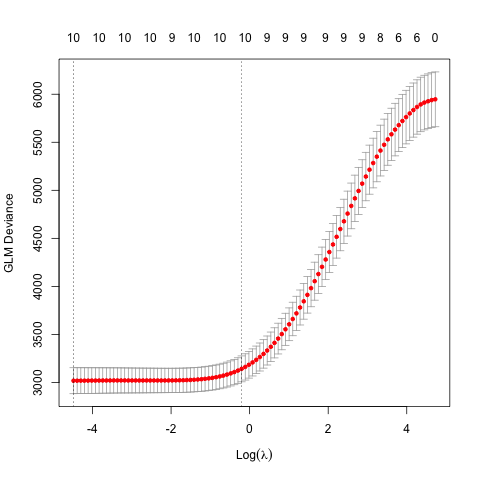

In [2]:
%%R -o X,Y,N
#install.packages('lars', repo='http://cloud.r-project.org')
library(lars)
library(glmnet)
data(diabetes)
X = model.matrix(lm(y ~ x, data=diabetes))[,-1]
N = colnames(diabetes$x)
Y = diabetes$y
plot(cv.glmnet(X, Y, family=gaussian(), alpha=0.4))
system.time(cv.glmnet(X, Y, family=gaussian(), 
                      alpha=0.4, nfolds=10))

In [3]:
X = pd.DataFrame(X, columns=N)
G = GLMNetPath(alpha=.4)
G.fit(X, Y)

GLMNetPath(lambda_values=array([1.00000000e+00, 9.11162756e-01, 8.30217568e-01, 7.56463328e-01,
       6.89261210e-01, 6.28029144e-01, 5.72236766e-01, 5.21400829e-01,
       4.75081016e-01, 4.32876128e-01, 3.94420606e-01, 3.59381366e-01,
       3.27454916e-01, 2.98364724e-01, 2.71858824e-01, 2.47707636e-01,
       2.25701972e-01, 2.05651231e-01, 1.87381742e-01, 1.70735265e-01,
       1.55567614e-01, 1.41747416e-01, 1.29154967e-01, 1.17681195e-01,
       1.07226722e-01, 9.77009957e-02, 8.90215085e-02, 8.11130831e-02,
       7.39072203e-02, 6.73415066e-02, 6.13590727e-02, 5.59081018e-02,
       5.09413801e-02, 4.64158883e-02, 4.22924287e-02, 3.85352859e-02,
       3.51119173e-02, 3.19926714e-02, 2.91505306e-02, 2.65608778e-02,
       2.42012826e-02, 2.20513074e-02, 2.00923300e-02, 1.83073828e-02,
       1.66810054e-02, 1.51991108e-02, 1.38488637e-02, 1.26185688e-02,
       1.14975700e-02, 1.04761575e-02, 9.54548457e-03, 8.69749003e-03,
       7.92482898e-03, 7.22080902e-03, 6.57933225e-03, 5.99484250e-03,
       5.46227722e-03, 4.97702356e-03, 4.53487851e-03, 4.13201240e-03,
       3.76493581e-03, 3.43046929e-03, 3.12571585e-03, 2.84803587e-03,
       2.59502421e-03, 2.36448941e-03, 2.15443469e-03, 1.96304065e-03,
       1.78864953e-03, 1.62975083e-03, 1.48496826e-03, 1.35304777e-03,
       1.23284674e-03, 1.12332403e-03, 1.02353102e-03, 9.32603347e-04,
       8.49753436e-04, 7.74263683e-04, 7.05480231e-04, 6.42807312e-04,
       5.85702082e-04, 5.33669923e-04, 4.86260158e-04, 4.43062146e-04,
       4.03701726e-04, 3.67837977e-04, 3.35160265e-04, 3.05385551e-04,
       2.78255940e-04, 2.53536449e-04, 2.31012970e-04, 2.10490414e-04,
       1.91791026e-04, 1.74752840e-04, 1.59228279e-04, 1.45082878e-04,
       1.32194115e-04, 1.20450354e-04, 1.09749877e-04, 1.00000000e-04]), lambda_fractional=True, alpha=0.4, lower_limits=-inf, upper_limits=inf, penalty_factor=None, fit_intercept=True, standardize=True, family=<statsmodels.genmod.families.family.Gaussian object at 0x1758c2380>, control=GLMNetPathControl(thresh=1e-07, maxit=100000, big=9.9e+35, logging=False, mxitnr=25, epsnr=1e-06, fdev=1e-05))

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='Coefficients ($\\beta$)'>

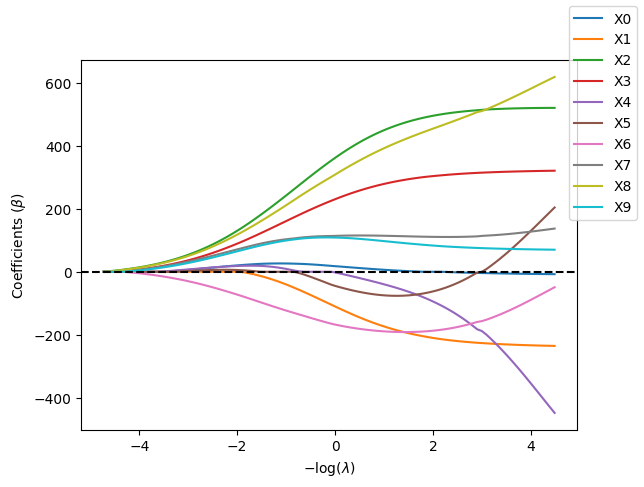

In [4]:
G.plot_coefficients(legend=True)

In [5]:
%%prun 
G.cross_validation_path(X, Y, cv=100, alignment='lambda')

         5648183 function calls (5363744 primitive calls) in 3.866 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10100    1.042    0.000    1.042    0.000 {built-in method glmnet.glmnetpp.wls}
   184305    0.203    0.000    0.203    0.000 {method 'reduce' of 'numpy.ufunc' objects}
196142/11110    0.170    0.000    0.351    0.000 copy.py:128(deepcopy)
    50500    0.141    0.000    0.392    0.000 family.py:145(deviance)
    10100    0.136    0.000    1.662    0.000 elnet.py:46(fit)
    30400    0.133    0.000    0.139    0.000 base.py:60(_matvec)
247313/165013    0.130    0.000    0.588    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    10100    0.113    0.000    2.713    0.000 irls.py:9(quasi_newton_step)
    10100    0.103    0.000    3.474    0.000 glm.py:180(fit)
    91601    0.069    0.000    0.205    0.000 fromnumeric.py:69(_wrapreduction)
      100    0.062    0.001    3.676    

In [6]:
%%timeit
G.control.logging = False
G.cross_validation_path(X, Y, cv=10, alignment='lambda')

259 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
G.control.logging = True
G.cross_validation_path(X, Y, cv=10, alignment='lambda')

871 ms ± 9.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


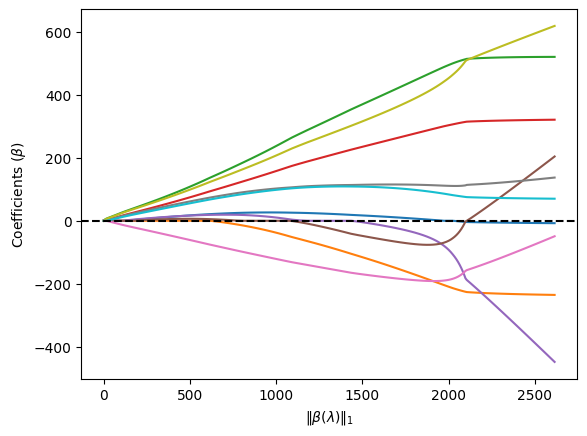

In [8]:
G.plot_coefficients(xvar='norm');

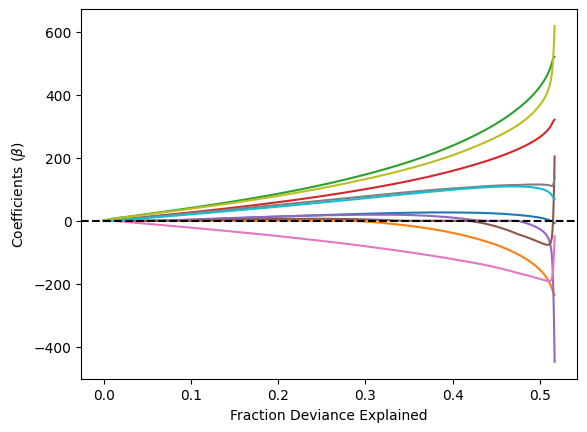

In [9]:
G.plot_coefficients(xvar='dev');

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='GLM Deviance'>

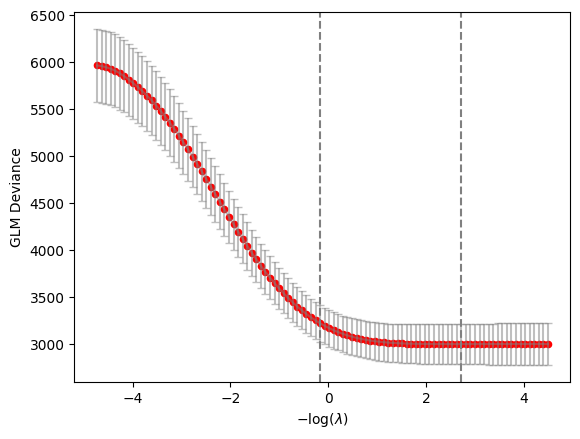

In [10]:
G.plot_cross_validation(xvar='lambda')

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='GLM Deviance'>

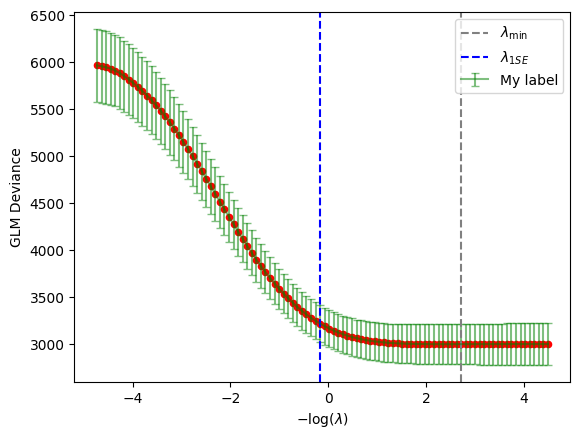

In [11]:
G2 = clone(G)
G2.fit(X, Y)
G2.cross_validation_path(X, Y, cv=10, alignment='fraction')
G2.plot_cross_validation(c='green', label='My label', legend=True, col_1se='blue')

In [12]:
yb = Y + np.random.standard_normal(Y.shape) > 140
X.insert(0, 'intercept', np.ones(Y.shape[0]))
glm = sm.GLM(yb,X,family=sm.families.Binomial())
results=glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.0028,0.126,0.023,0.982
age,-0.1841,2.783,-0.066,0.947
sex,-12.1290,3.078,-3.941,0.000
bmi,13.1653,3.297,3.994,0.000
map,11.5691,3.116,3.713,0.000
tc,-34.3650,23.264,-1.477,0.140
ldl,24.1097,19.716,1.223,0.221
hdl,0.3047,11.259,0.027,0.978
tch,1.0151,8.053,0.126,0.900
ltg,30.6196,9.724,3.149,0.002


In [13]:
from glmnet import GLM, GLMNet

#G3 = GLMNetPath(alpha=.4,family=sm.families.Binomial())
G3 = GLM(family=sm.families.Binomial(), summarize=True)
G3.fit(X.drop(columns=['intercept']), yb)
G3.summary_

,coef,std err,t,P>|t|
intercept,0.002827,0.125597,0.022507,0.982044
age,-0.184131,2.782827,-0.066167,0.947245
sex,-12.128994,3.077926,-3.940639,0.000081
bmi,13.165336,3.296487,3.993747,0.000065
map,11.569126,3.116167,3.712614,0.000205
tc,-34.365048,23.263550,-1.477206,0.139621
ldl,24.109692,19.716251,1.222833,0.221393
hdl,0.304745,11.258454,0.027068,0.978405
tch,1.015106,8.053103,0.126052,0.899691
ltg,30.619632,9.723579,3.149008,0.001638


In [14]:
np.isnan(yb).sum()

0

In [15]:
G3 = GLMNet(family=sm.families.Binomial(), alpha=0.4, lambda_val=0.02081227758950013)
G3.fit(X.drop(columns=['intercept']), yb)
G3.coef_
G3.null_deviance_

612.7421076149917

In [16]:
G4 = GLMNetPath(family=sm.families.Binomial(), alpha=0.4 )
G4.fit(X.drop(columns=['intercept']), yb)


GLMNetPath(lambda_values=array([1.00000000e+00, 9.11162756e-01, 8.30217568e-01, 7.56463328e-01,
       6.89261210e-01, 6.28029144e-01, 5.72236766e-01, 5.21400829e-01,
       4.75081016e-01, 4.32876128e-01, 3.94420606e-01, 3.59381366e-01,
       3.27454916e-01, 2.98364724e-01, 2.71858824e-01, 2.47707636e-01,
       2.25701972e-01, 2.05651231e-01, 1.87381742e-01, 1.70735265e-01,
       1.55567614e-01, 1.41747416e-01, 1.29154967e-01, 1.17681195e-01,
       1.07226722e-01, 9.77009957e-02, 8.90215085e-02, 8.11130831e-02,
       7.39072203e-02, 6.73415066e-02, 6.13590727e-02, 5.59081018e-02,
       5.09413801e-02, 4.64158883e-02, 4.22924287e-02, 3.85352859e-02,
       3.51119173e-02, 3.19926714e-02, 2.91505306e-02, 2.65608778e-02,
       2.42012826e-02, 2.20513074e-02, 2.00923300e-02, 1.83073828e-02,
       1.66810054e-02, 1.51991108e-02, 1.38488637e-02, 1.26185688e-02,
       1.14975700e-02, 1.04761575e-02, 9.54548457e-03, 8.69749003e-03,
       7.92482898e-03, 7.22080902e-03, 6.57933225e-03, 5.99484250e-03,
       5.46227722e-03, 4.97702356e-03, 4.53487851e-03, 4.13201240e-03,
       3.76493581e-03, 3.43046929e-03, 3.12571585e-03, 2.84803587e-03,
       2.59502421e-03, 2.36448941e-03, 2.15443469e-03, 1.96304065e-03,
       1.78864953e-03, 1.62975083e-03, 1.48496826e-03, 1.35304777e-03,
       1.23284674e-03, 1.12332403e-03, 1.02353102e-03, 9.32603347e-04,
       8.49753436e-04, 7.74263683e-04, 7.05480231e-04, 6.42807312e-04,
       5.85702082e-04, 5.33669923e-04, 4.86260158e-04, 4.43062146e-04,
       4.03701726e-04, 3.67837977e-04, 3.35160265e-04, 3.05385551e-04,
       2.78255940e-04, 2.53536449e-04, 2.31012970e-04, 2.10490414e-04,
       1.91791026e-04, 1.74752840e-04, 1.59228279e-04, 1.45082878e-04,
       1.32194115e-04, 1.20450354e-04, 1.09749877e-04, 1.00000000e-04]), lambda_fractional=True, alpha=0.4, lower_limits=-inf, upper_limits=inf, penalty_factor=None, fit_intercept=True, standardize=True, family=<statsmodels.genmod.families.family.Binomial object at 0x2b01726e0>, control=GLMNetPathControl(thresh=1e-07, maxit=100000, big=9.9e+35, logging=False, mxitnr=25, epsnr=1e-06, fdev=1e-05))

In [17]:
%%capture
fig, ax = plt.subplots()

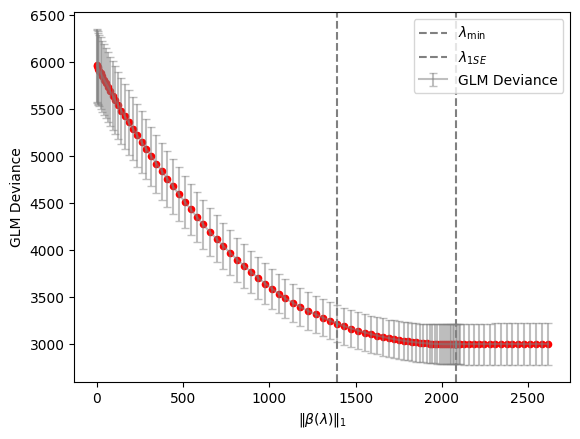

In [18]:
G2.plot_cross_validation(ax=ax, xvar='norm', legend=True)
fig